In [1]:
import pandas as pd 
import numpy as np
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Baca DataFrame dari dataset_komentar_instragram_cyberbulling.csv

In [2]:
df = pd.read_excel('versi 4.0.2.xlsx')

In [3]:
df

,Sentiment,content,score,reviewCreatedVersion
0,Negative,Biasanya saya scan QR code di lobby kantor set...,1,4.0.2
1,Negative,Setelah di-update versi terbaru kok malah gak ...,1,4.0.2
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...,1,4.0.2
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...,1,4.0.2
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda...",1,4.0.2
...,...,...,...,...
1943,Negative,aku gak bis masuknya,5,4.0.2
1944,Negative,Ko gx bisa login.,5,4.0.2
1945,Negative,Koq gak mau kebuka,5,4.0.2
1946,Positive,Semoga sehat semua,5,4.0.2


In [4]:
df_skripsi = df.drop(['score','reviewCreatedVersion'],axis = 1)

In [5]:
df_skripsi

,Sentiment,content
0,Negative,Biasanya saya scan QR code di lobby kantor set...
1,Negative,Setelah di-update versi terbaru kok malah gak ...
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...
1943,Negative,aku gak bis masuknya
1944,Negative,Ko gx bisa login.
1945,Negative,Koq gak mau kebuka
1946,Positive,Semoga sehat semua


In [6]:
komennegatif= df_skripsi[df_skripsi['Sentiment'] == "Negative"]

In [7]:
komenpositif= df_skripsi[df_skripsi['Sentiment'] == "Positive"]

In [8]:
komennegatif100 = komennegatif.head(100)
komenpositif100 = komenpositif.head(100)

In [9]:
df_komen100 = komennegatif100.merge(komenpositif100 , how='outer')
df_komen100

,Sentiment,content
0,Negative,Biasanya saya scan QR code di lobby kantor set...
1,Negative,Setelah di-update versi terbaru kok malah gak ...
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...
195,Positive,"Saya baru membuka aplikasi ini,mungkin sangat ..."
196,Positive,Berfungsi...... buat kalian yg susah masuk.. a...
197,Positive,Banyak yang bilng katanya udh vaksin tpi serti...
198,Positive,Download langsung surat vaksin. Jadi kalo butu...


# Mendeteksi Positif & Negatif

In [10]:
df_komen100.Sentiment.value_counts()

Negative    100
Positive    100
Name: Sentiment, dtype: int64

In [11]:
df_skripsi = df_komen100

# Menampilkan Bagian kolom pada data

In [12]:
df_skripsi.columns = ['label','text']

In [13]:
df_skripsi['text_real'] = df_skripsi.text

# Menampilkan DataFrame

In [14]:
df_skripsi

,label,text,text_real
0,Negative,Biasanya saya scan QR code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,Setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
195,Positive,"Saya baru membuka aplikasi ini,mungkin sangat ...","Saya baru membuka aplikasi ini,mungkin sangat ..."
196,Positive,Berfungsi...... buat kalian yg susah masuk.. a...,Berfungsi...... buat kalian yg susah masuk.. a...
197,Positive,Banyak yang bilng katanya udh vaksin tpi serti...,Banyak yang bilng katanya udh vaksin tpi serti...
198,Positive,Download langsung surat vaksin. Jadi kalo butu...,Download langsung surat vaksin. Jadi kalo butu...


# Mengubah Huruf menjadi kecil

In [15]:
df_skripsi['text'] = df_skripsi['text'].str.lower()
print('Case Folding Result : \n')
print(df_skripsi['text'].head(5))
print('\n\n\n')

Case Folding Result : 

0    biasanya saya scan qr code di lobby kantor set...
1    setelah di-update versi terbaru kok malah gak ...
2    sekarang update terbaru malah ga bisa masuk ad...
3    gimana ini aplikasi kok gak bisa di gunakan. s...
4    sebelumnya ada pilihan warga negara, saya suda...
Name: text, dtype: object






# Menghapus special karakter dan url

In [16]:
def remove_text_special(text):
    # hapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # hapus non ASCII (emot, bahasa china dll)
    text = text.encode('ascii', 'replace').decode('ascii')
    # hapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove URL 
    return text.replace("http://", " ").replace("https://", " ")
df_skripsi['text'] = df_skripsi.text.astype('str')                
df_skripsi['text'] = df_skripsi['text'].apply(remove_text_special)




In [17]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan. s...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
195,Positive,"saya baru membuka aplikasi ini,mungkin sangat ...","Saya baru membuka aplikasi ini,mungkin sangat ..."
196,Positive,berfungsi...... buat kalian yg susah masuk.. a...,Berfungsi...... buat kalian yg susah masuk.. a...
197,Positive,banyak yang bilng katanya udh vaksin tpi serti...,Banyak yang bilng katanya udh vaksin tpi serti...
198,Positive,download langsung surat vaksin. jadi kalo butu...,Download langsung surat vaksin. Jadi kalo butu...


# Menghapus elongasi 


In [18]:
#remove kata yang sengaja dipanjangkan
# seperti bisaaaaaaa -> bisa
def spell(word):
    if re.search(r'([a-zA-Z])\1{2,}', word):
        rword = re.sub(r'([a-zA-Z])\1{2,}','\\1', word)
        return rword
    else:
        return word
df_skripsi['text'] = df_skripsi['text'].apply(spell)



In [19]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan. s...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
195,Positive,"saya baru membuka aplikasi ini,mungkin sangat ...","Saya baru membuka aplikasi ini,mungkin sangat ..."
196,Positive,berfungsi...... buat kalian yg susah masuk.. a...,Berfungsi...... buat kalian yg susah masuk.. a...
197,Positive,banyak yang bilng katanya udh vaksin tpi serti...,Banyak yang bilng katanya udh vaksin tpi serti...
198,Positive,download langsung surat vaksin. jadi kalo butu...,Download langsung surat vaksin. Jadi kalo butu...


# menghapus tanda baca

In [20]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df_skripsi['text'] = df_skripsi['text'].apply(remove_punctuation)



In [21]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
195,Positive,saya baru membuka aplikasi inimungkin sangat b...,"Saya baru membuka aplikasi ini,mungkin sangat ..."
196,Positive,berfungsi buat kalian yg susah masuk alangkah ...,Berfungsi...... buat kalian yg susah masuk.. a...
197,Positive,banyak yang bilng katanya udh vaksin tpi serti...,Banyak yang bilng katanya udh vaksin tpi serti...
198,Positive,download langsung surat vaksin jadi kalo butuh...,Download langsung surat vaksin. Jadi kalo butu...


# menghapus enter tab

In [22]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df_skripsi['text'] = df_skripsi['text'].apply(remove_whitespace_LT)


In [23]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
195,Positive,saya baru membuka aplikasi inimungkin sangat b...,"Saya baru membuka aplikasi ini,mungkin sangat ..."
196,Positive,berfungsi buat kalian yg susah masuk alangkah ...,Berfungsi...... buat kalian yg susah masuk.. a...
197,Positive,banyak yang bilng katanya udh vaksin tpi serti...,Banyak yang bilng katanya udh vaksin tpi serti...
198,Positive,download langsung surat vaksin jadi kalo butuh...,Download langsung surat vaksin. Jadi kalo butu...


# menghapus spasi yang terlalu banyak

In [24]:
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df_skripsi['text'] = df_skripsi['text'].apply(remove_whitespace_multiple)

# menghapus karakter single seperti a b c d

In [25]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df_skripsi['text'] = df_skripsi['text'].apply(remove_singl_char)

In [26]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
195,Positive,saya baru membuka aplikasi inimungkin sangat b...,"Saya baru membuka aplikasi ini,mungkin sangat ..."
196,Positive,berfungsi buat kalian yg susah masuk alangkah ...,Berfungsi...... buat kalian yg susah masuk.. a...
197,Positive,banyak yang bilng katanya udh vaksin tpi serti...,Banyak yang bilng katanya udh vaksin tpi serti...
198,Positive,download langsung surat vaksin jadi kalo butuh...,Download langsung surat vaksin. Jadi kalo butu...


# Membuat kolom text_token berisi kumpulan kata kata yang dipisah dengan koma

In [27]:
df_skripsi = df_skripsi.drop_duplicates()
df_skripsi = df_skripsi[['text_real','text','label']]
df_skripsi['text'] = df_skripsi['text'].str.lower()

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_skripsi['text_tokens'] = df_skripsi['text'].apply(word_tokenize_wrapper)

In [28]:
df_skripsi

,text_real,text,label,text_tokens
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya..."
...,...,...,...,...
195,"Saya baru membuka aplikasi ini,mungkin sangat ...",saya baru membuka aplikasi inimungkin sangat b...,Positive,"[saya, baru, membuka, aplikasi, inimungkin, sa..."
196,Berfungsi...... buat kalian yg susah masuk.. a...,berfungsi buat kalian yg susah masuk alangkah ...,Positive,"[berfungsi, buat, kalian, yg, susah, masuk, al..."
197,Banyak yang bilng katanya udh vaksin tpi serti...,banyak yang bilng katanya udh vaksin tpi serti...,Positive,"[banyak, yang, bilng, katanya, udh, vaksin, tp..."
198,Download langsung surat vaksin. Jadi kalo butu...,download langsung surat vaksin jadi kalo butuh...,Positive,"[download, langsung, surat, vaksin, jadi, kalo..."


# Menghapus stopwords

In [29]:
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
df_skripsi['text_tokens_WSW'] = df_skripsi['text_tokens'].apply(stopwords_removal) 

In [30]:
list_stopwords

{'waktunya',
 '',
 'tanpa',
 'ditanyakan',
 'neng',
 'ehh',
 'jab',
 'piyek',
 'mrk',
 'demikian',
 'mlm',
 'mere',
 'mah',
 'kelima',
 'kurang',
 'kerja',
 'zzz',
 'bahkan',
 'u',
 'sebaiknya',
 'sedang',
 'malahan',
 'bulan',
 'jikalau',
 'np',
 'cukup',
 'stand',
 'ping',
 'sekali-kali',
 'aja',
 'umumnya',
 'mgg',
 'bas',
 'berada',
 'hih',
 'yang',
 'jln',
 'dipersoalkan',
 'seng',
 'nya',
 'dikerjakan',
 'sejenak',
 'biarpun',
 'mend',
 'oh',
 'po',
 'acan',
 'sebab',
 'masa',
 'baaeerrree',
 'come',
 'misalkan',
 'bat',
 'terbanyak',
 'sebetulnya',
 'kok',
 'liyat',
 'hmmmmmm',
 'ayoo',
 'tuip',
 'sud',
 'yaah',
 'dimulailah',
 'bukankah',
 'bertanya-tanya',
 'meski',
 'third',
 'tu',
 'lima',
 'woyyy',
 'sib',
 'sook',
 'om',
 'keseluruhannya',
 'sendirian',
 'diketahuinya',
 'setidak-tidaknya',
 'disinilah',
 'sayalah',
 'bai',
 'saja',
 'mistakes',
 'jumlahnya',
 'sesuatunya',
 'tutur',
 'harusnya',
 'drpd',
 'udahan',
 'jd',
 'silakan',
 'menjawab',
 'bagaimanapun',
 'dimisa

In [31]:
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s..."
...,...,...,...,...,...
195,"Saya baru membuka aplikasi ini,mungkin sangat ...",saya baru membuka aplikasi inimungkin sangat b...,Positive,"[saya, baru, membuka, aplikasi, inimungkin, sa...","[membuka, aplikasi, inimungkin, berguna, pengg..."
196,Berfungsi...... buat kalian yg susah masuk.. a...,berfungsi buat kalian yg susah masuk alangkah ...,Positive,"[berfungsi, buat, kalian, yg, susah, masuk, al...","[berfungsi, susah, baiknya, pergi, pengaturan,..."
197,Banyak yang bilng katanya udh vaksin tpi serti...,banyak yang bilng katanya udh vaksin tpi serti...,Positive,"[banyak, yang, bilng, katanya, udh, vaksin, tp...","[bilng, udh, vaksin, tpi, sertifikat, blum, va..."
198,Download langsung surat vaksin. Jadi kalo butu...,download langsung surat vaksin jadi kalo butuh...,Positive,"[download, langsung, surat, vaksin, jadi, kalo...","[download, surat, vaksin, butuh, buka, aplikas..."


# Distribusi frekuensi NLTK

In [32]:
def freqDist_wrapper(text):
    return FreqDist(text)

df_skripsi['text_tokens_fdist'] = df_skripsi['text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df_skripsi['text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(qr, 2), (code, 2), (update, 2), (biasanya, 1...
1    [(gak, 4), (bisa, 4), (dibuka, 3), (bolak, 2),...
2    [(hp, 5), (untuk, 4), (ga, 2), (masuk, 2), (aj...
3    [(gak, 4), (bisa, 3), (saya, 3), (gimana, 2), ...
4    [(saya, 4), (untuk, 4), (tidak, 4), (ada, 3), ...
Name: text_tokens_fdist, dtype: object


# Filtering (penghapusan stopwords) / normalisasi

In [33]:
from nltk.corpus import stopwords


In [34]:
list_stopwords = stopwords.words('indonesian')

In [35]:
list_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

clf =  RandomForestClassifier(random_state=0, max_features ='sqrt',max_depth = 100)
knn = KNeighborsClassifier(n_neighbors=7)
nb = GaussianNB()
dt = DecisionTreeClassifier(max_features ='sqrt',max_depth = 100)
svm = SVC(degree=3)
# clf.fit(X, y)

In [37]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

normalizad_word = pd.read_csv("colloquial-indonesian-lexicon (1).csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df_skripsi['text_normalized'] = df_skripsi['text_tokens_WSW'].apply(normalized_term)


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df_skripsi['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df_skripsi['text_tokens_stemmed'] = df_skripsi['text_normalized'].swifter.apply(get_stemmed_term)

1303
------------------------
scan : scan
qr : qr
code : code
lobby : lobby
kantor : kantor
pagitetapi : pagitetapi
aplikasi : aplikasi
errorscan : errorscan
melebihi : lebih
radius : radius
error : error
diupdate : diupdate
versi : versi
terbaru : baru
dibuka : buka
bolak : bolak
force : force
close : close
sayangnya : sayang
pedulilindungi : pedulilindungi
berhenti : henti
coba : coba
uninstal : uninstal
instal : instal
hasilnya : hasil
akun : akun
vaksin : vaksin
1 : 1
2 : 2
begini : begini
nyusahkan : nyusahkan
masyarakat : masyarakat
repot : repot
aplikasinya : aplikasi
perbaiki : baik
masak : masak
beli : beli
hape : hape
gara : gara
centangan : centangan
setuju : tuju
diam : diam
respon : respon
hp : hp
teman : teman
diperbaiki : baik
dipakai : pakai
seindonesia : indonesia
ganti : ganti
makan : makan
susah : susah
rakyat : rakyat
urgent : urgent
android : android
dibawah : bawah
6 : 6
support : support
pakai : pakai
5 : 5
berat : berat
pemerintah : perintah
sumbang : sumbang
do

perbaikan : baik
sisi : sisi
backendnya : backendnya
checkin : checkin
dibilang : bilang
tautan : taut
apps : apps
sampai : sampai
memilih : pilih
wnicontreng : wnicontreng
sebenarnya : benar
submit : submit
setting : setting
hptampilanukuran : hptampilanukuran
tekspilih : tekspilih
alami : alami
pembuat : buat
terimakasih : terimakasih
menginstal : menginstal
tanda : tanda
menerima : terima
isi : isi
kursor : kursor
melanjutkan : lanjut
kotak : kotak
biru : biru
8 : 8
mhn : mhn
bantuan : bantu
informasinya : informasi
tanggung : tanggung
jawab : jawab
kenapa : kenapa
lagi : lagi
hanya : hanya
kemkes : kemkes
ri : ri
menyepelakan : pelak
fix : fix
berguna : guna
emosi : emosi
buatan : buat
corporate : corporate
swasta : swasta
user : user
friendly : friendly
kakak : kakak
setujui : tuju
dadakan : dada
corona : corona
kodenya : kode
failed : failed
hemm : hemm
pusing : pusing
kepentingan : penting
13102021 : 13102021
test : test
swab : swab
pcr : pcr
negatif : negatif
covid : covid
402 

pelayanannyasmoga : pelayanannyasmoga
kedepannya : depan
slalujangan : slalujangan
lupa : lupa
informasi : informasi
dosis : dosis
2trims : 2trims
layarfont : layarfont
cocok : cocok
terdata : data
mendaftarkan : daftar
ibunda : ibunda
cek : cek
tks : tks
pelacakan : lacak
sayatrimsapl : sayatrimsapl
lindungimantap : lindungimantap
wabah : wabah
menjadikan : jadi
ladang : ladang
bisnisyang : bisnisyang
paspasan : paspasan
dipelajari : ajar
bermanfaat : manfaat
protokol : protokol
terima kasih : terima kasih
kebetulann : kebetulann
far : far
maksimal : maksimal
mantap : mantap
11 : 11
perizinan : izin
hemat : hemat
upload : upload
foto : foto
notif : notif
dihilangkan : hilang
lagitampilan : lagitampilan
buruan : buru
takut : takut
mengatur : atur
suntik : suntik
kampung : kampung
sekeluarga : keluarga
12 : 12
tenang : tenang
loadingnya : loadingnya
tidk : tidk
diwarga : warga
disetuju : tuju
kenap : kenap
makai : maka
apikasi : apikasi
aplikasinyasangat : aplikasinyasangat
sekaligtu : 

Pandas Apply:   0%|          | 0/200 [00:00<?, ?it/s]

In [38]:
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW,text_tokens_fdist,text_normalized,text_tokens_stemmed
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","{'biasanya': 1, 'saya': 1, 'scan': 1, 'qr': 2,...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","[scan, qr, code, lobby, kantor, pagitetapi, ap..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc...","{'setelah': 1, 'diupdate': 1, 'versi': 1, 'ter...","[diupdate, versi, terbaru, dibuka, bolak, forc...","[diupdate, versi, baru, buka, bolak, force, cl..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,...","{'sekarang': 1, 'update': 1, 'terbaru': 1, 'ma...","[terbaru, centangan, setuju, diam, respon, hp,...","[baru, centangan, tuju, diam, respon, hp, tema..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn...","{'gimana': 2, 'ini': 2, 'aplikasi': 1, 'kok': ...","[aplikasi, downlod, centa, setujutapi, maksudn...","[aplikasi, downlod, centa, setujutapi, maksud,..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s...","{'sebelumnya': 1, 'ada': 3, 'pilihan': 1, 'war...","[pilihan, warga, negara, klik, wni, centang, s...","[pilih, warga, negara, klik, wni, centang, tuj..."
...,...,...,...,...,...,...,...,...
195,"Saya baru membuka aplikasi ini,mungkin sangat ...",saya baru membuka aplikasi inimungkin sangat b...,Positive,"[saya, baru, membuka, aplikasi, inimungkin, sa...","[membuka, aplikasi, inimungkin, berguna, pengg...","{'saya': 1, 'baru': 1, 'membuka': 1, 'aplikasi...","[membuka, aplikasi, inimungkin, berguna, pengg...","[buka, aplikasi, inimungkin, guna, guna, kemba..."
196,Berfungsi...... buat kalian yg susah masuk.. a...,berfungsi buat kalian yg susah masuk alangkah ...,Positive,"[berfungsi, buat, kalian, yg, susah, masuk, al...","[berfungsi, susah, baiknya, pergi, pengaturan,...","{'berfungsi': 1, 'buat': 1, 'kalian': 2, 'yg':...","[berfungsi, susah, baiknya, pergi, pengaturan,...","[fungsi, susah, baik, pergi, atur, kecil, font..."
197,Banyak yang bilng katanya udh vaksin tpi serti...,banyak yang bilng katanya udh vaksin tpi serti...,Positive,"[banyak, yang, bilng, katanya, udh, vaksin, tp...","[bilng, udh, vaksin, tpi, sertifikat, blum, va...","{'banyak': 1, 'yang': 1, 'bilng': 1, 'katanya'...","[bilang, sudah, vaksin, tapi, sertifikat, belu...","[bilang, sudah, vaksin, tapi, sertifikat, belu..."
198,Download langsung surat vaksin. Jadi kalo butu...,download langsung surat vaksin jadi kalo butuh...,Positive,"[download, langsung, surat, vaksin, jadi, kalo...","[download, surat, vaksin, butuh, buka, aplikas...","{'download': 1, 'langsung': 1, 'surat': 1, 'va...","[download, surat, vaksin, butuh, buka, aplikas...","[download, surat, vaksin, butuh, buka, aplikas..."


# Menampilkan kembali gabungan data

In [39]:
def merge_again(text):
    return ' '.join(text)

In [40]:
df_skripsi['done_text'] = df_skripsi['text_tokens_stemmed'].apply(merge_again)
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW,text_tokens_fdist,text_normalized,text_tokens_stemmed,done_text
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","{'biasanya': 1, 'saya': 1, 'scan': 1, 'qr': 2,...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","[scan, qr, code, lobby, kantor, pagitetapi, ap...",scan qr code lobby kantor pagitetapi aplikasi ...
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc...","{'setelah': 1, 'diupdate': 1, 'versi': 1, 'ter...","[diupdate, versi, terbaru, dibuka, bolak, forc...","[diupdate, versi, baru, buka, bolak, force, cl...",diupdate versi baru buka bolak force close say...
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,...","{'sekarang': 1, 'update': 1, 'terbaru': 1, 'ma...","[terbaru, centangan, setuju, diam, respon, hp,...","[baru, centangan, tuju, diam, respon, hp, tema...",baru centangan tuju diam respon hp teman baik ...
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn...","{'gimana': 2, 'ini': 2, 'aplikasi': 1, 'kok': ...","[aplikasi, downlod, centa, setujutapi, maksudn...","[aplikasi, downlod, centa, setujutapi, maksud,...",aplikasi downlod centa setujutapi maksud kemar...
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s...","{'sebelumnya': 1, 'ada': 3, 'pilihan': 1, 'war...","[pilihan, warga, negara, klik, wni, centang, s...","[pilih, warga, negara, klik, wni, centang, tuj...",pilih warga negara klik wni centang tuju syara...
...,...,...,...,...,...,...,...,...,...
195,"Saya baru membuka aplikasi ini,mungkin sangat ...",saya baru membuka aplikasi inimungkin sangat b...,Positive,"[saya, baru, membuka, aplikasi, inimungkin, sa...","[membuka, aplikasi, inimungkin, berguna, pengg...","{'saya': 1, 'baru': 1, 'membuka': 1, 'aplikasi...","[membuka, aplikasi, inimungkin, berguna, pengg...","[buka, aplikasi, inimungkin, guna, guna, kemba...",buka aplikasi inimungkin guna guna kembang dun...
196,Berfungsi...... buat kalian yg susah masuk.. a...,berfungsi buat kalian yg susah masuk alangkah ...,Positive,"[berfungsi, buat, kalian, yg, susah, masuk, al...","[berfungsi, susah, baiknya, pergi, pengaturan,...","{'berfungsi': 1, 'buat': 1, 'kalian': 2, 'yg':...","[berfungsi, susah, baiknya, pergi, pengaturan,...","[fungsi, susah, baik, pergi, atur, kecil, font...",fungsi susah baik pergi atur kecil font ponsel
197,Banyak yang bilng katanya udh vaksin tpi serti...,banyak yang bilng katanya udh vaksin tpi serti...,Positive,"[banyak, yang, bilng, katanya, udh, vaksin, tp...","[bilng, udh, vaksin, tpi, sertifikat, blum, va...","{'banyak': 1, 'yang': 1, 'bilng': 1, 'katanya'...","[bilang, sudah, vaksin, tapi, sertifikat, belu...","[bilang, sudah, vaksin, tapi, sertifikat, belu...",bilang sudah vaksin tapi sertifikat belum vaks...
198,Download langsung surat vaksin. Jadi kalo butu...,download langsung surat vaksin jadi kalo butuh...,Positive,"[download, langsung, surat, vaksin, jadi, kalo...","[download, surat, vaksin, butuh, buka, aplikas...","{'download': 1, 'langsung': 1, 'surat': 1, 'va...","[download, surat, vaksin, butuh, buka, aplikas...","[download, surat, vaksin, butuh, buka, aplikas...",download surat vaksin butuh buka aplikasi warg...


In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [42]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
tfid = TfidfVectorizer(
    min_df = 3,
    max_df = 0.10,
    ngram_range = (1,2)
)


In [45]:
count_vect = CountVectorizer(
    min_df = 3,
    max_df = 0.10,
    ngram_range = (1,2)
)

In [46]:
tfid_result = tfid.fit_transform(df_skripsi["done_text"]).toarray()
tfid_df = pd.DataFrame(tfid_result, columns = tfid.get_feature_names())
tfid_df.columns = ["word_" + str(x) for x in tfid_df.columns]
tfid_df.index = df_skripsi.index
# new_data = pd.concat([, tfid_df], axis=1)

In [47]:
tfid_df.columns

Index(['word_2x', 'word_70', 'word_ada', 'word_admin', 'word_akses',
       'word_akun', 'word_alami', 'word_anak', 'word_android',
       'word_android baru',
       ...
       'word_versi 70', 'word_versi android', 'word_versi baru', 'word_via',
       'word_virus', 'word_wajib', 'word_warga', 'word_warga indonesia',
       'word_warga negara', 'word_wni'],
      dtype='object', length=293)

In [48]:
cvzr_result = count_vect.fit_transform(df_skripsi["done_text"]).toarray()
cvzr_df = pd.DataFrame(cvzr_result, columns = count_vect.get_feature_names())
cvzr_df.columns = ["word_" + str(x) for x in cvzr_df.columns]
cvzr_df.index = df_skripsi.index
# new_data = pd.concat([, tfid_df], axis=1)

# Menampilkan label kolom

In [49]:
kolomcv = cvzr_df.columns
kolomcv

Index(['word_2x', 'word_70', 'word_ada', 'word_admin', 'word_akses',
       'word_akun', 'word_alami', 'word_anak', 'word_android',
       'word_android baru',
       ...
       'word_versi 70', 'word_versi android', 'word_versi baru', 'word_via',
       'word_virus', 'word_wajib', 'word_warga', 'word_warga indonesia',
       'word_warga negara', 'word_wni'],
      dtype='object', length=293)

# Menampilkan Hasil classification

In [50]:
y = df_skripsi.label

In [51]:
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(clf, X, y, cv=5)
conf_mat = confusion_matrix(y_pred, y)

In [52]:
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))


[[74 14]
 [26 86]]
              precision    recall  f1-score   support

    Negative     0.8409    0.7400    0.7872       100
    Positive     0.7679    0.8600    0.8113       100

    accuracy                         0.8000       200
   macro avg     0.8044    0.8000    0.7993       200
weighted avg     0.8044    0.8000    0.7993       200



In [53]:
print('SVM')
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(svm, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

SVM
[[89 22]
 [11 78]]
              precision    recall  f1-score   support

    Negative     0.8018    0.8900    0.8436       100
    Positive     0.8764    0.7800    0.8254       100

    accuracy                         0.8350       200
   macro avg     0.8391    0.8350    0.8345       200
weighted avg     0.8391    0.8350    0.8345       200



In [54]:
print('SVM')
X = tfid_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(svm, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

SVM
[[81 26]
 [19 74]]
              precision    recall  f1-score   support

    Negative     0.7570    0.8100    0.7826       100
    Positive     0.7957    0.7400    0.7668       100

    accuracy                         0.7750       200
   macro avg     0.7764    0.7750    0.7747       200
weighted avg     0.7764    0.7750    0.7747       200



# Menampilkan hasil Naive Bayes

In [55]:
print('Naive Bayes')
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(nb, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

Naive Bayes
[[90 37]
 [10 63]]
              precision    recall  f1-score   support

    Negative     0.7087    0.9000    0.7930       100
    Positive     0.8630    0.6300    0.7283       100

    accuracy                         0.7650       200
   macro avg     0.7858    0.7650    0.7606       200
weighted avg     0.7858    0.7650    0.7606       200



In [68]:
print('Naive Bayes')
X = tfid_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(nb, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

Naive Bayes
[[89 42]
 [11 58]]
              precision    recall  f1-score   support

    Negative     0.6794    0.8900    0.7706       100
    Positive     0.8406    0.5800    0.6864       100

    accuracy                         0.7350       200
   macro avg     0.7600    0.7350    0.7285       200
weighted avg     0.7600    0.7350    0.7285       200



In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [58]:
SemuaText = "".join(df_skripsi['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [59]:
SemuaText

'scan qr code lobby kantor pagitetapi aplikasi errorscan qr code lebih radius errordiupdate versi baru buka bolak force close sayang pedulilindungi henti coba uninstal instal hasil bolak hasil akun vaksin 1 2 begini nyusahkan masyarakat scan qr repot aplikasi buka baik aplikasi masak beli hape masak gara gara pedulilindungi bukabaru centangan tuju diam respon hp teman baik aplikasi pakai indonesia masak ganti hp makan susah rakyat urgent baik android bawah 6 support hp pakai android 6 5 berat beli hp perintah sumbang hpaplikasi downlod centa setujutapi maksud kemarin pergi2 check barcode mau peduli lindung pedulipilih warga negara klik wni centang tuju syarat guna bijak privasi selanjutnnya apa ulang 5 hasil apa uninstall instal aplikasi pedulilindungi solusi scan barcode unjung harus login pedulilindungi solusisemejak aplikasi wajib busway buang aplikasi sampah lambat hambat susah repot sebal aplikasi benarbenar sulit check susah sertifikat muncul aplikasi gembelhp login coba klik buk

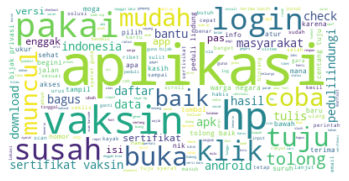

In [60]:
create_wordcloud(SemuaText,"Semua Sentimen")

In [61]:
komenpositif= df_skripsi[df_skripsi['label'] == "Positive"]


In [62]:
Positive = "".join(komenpositif['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

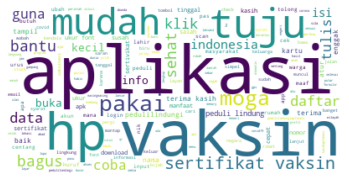

In [63]:
create_wordcloud(Positive,"Semua Positive")

In [64]:
komennegatif= df_skripsi[df_skripsi['label'] == "Negative"]

In [65]:
Negative = "".join(komennegatif['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

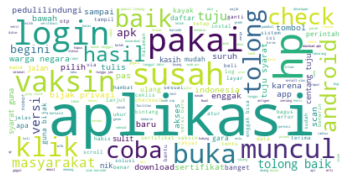

In [66]:
create_wordcloud(Negative,"Semua Negative")